### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [ ]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>California Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in California districts</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #1</b></span>

<img src="https://github.com/xavecoding/IFSP-CMP-D2APR-2021.2/blob/main/projects/portfolio/project-01_regression_California-housing-prices/imgs/california-flag.png?raw=1" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the ***Machine Learning Project Checklist by xavecoding***. <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Frame the problem
- Get the data
- Data cleaning
- Simple EDA to gain insights
- Initial data preprocessing
- Train a (single) ML algorithm with all features and default hyperparameters
---

### 0. Imports and default settings for plotting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 🔲 1. Frame the Problem

### 📄 1.1. Context
<table align="left" class='dashed-box'>
<tr>
    <td>💡</td>
    <td>If you still do not have the context of the problem or if it is uncler to you, you may search for the subject on the internet, for example, on news sites or academic papers.</td>
</tr>
<tr style="background-color: white !important">
    <td></td>
    <td>This will help you not only to understand the problem better, but also in formulating and writing its context here.</td>
</tr>
</table><br/><br/><br/><br/>
    
The  housing  market  is  an  important,  yet  special,  sector  of  the  national  economy.  Its  importance  is  derived  from  two  main  factors:  the  size  of  the  housing  market  and  the  functions  that  residential  properties  perform.  Residential properties additionally perform a number of important socio-economic functions. They meet the most basic needs of having a place to call home and a sense of security, as well as the needs of a higher order, such as the possibility of forming social ties or meeting the needs of self-realization [1].

**Sao Paulo** is the most populous city in Brazil with a population about 12.4 million (estimated, 2021) [2]. It also the largest economy in Brazil, boasting a R$ 714 billion gross state product (GSP) as of 2018. [3].

Sao Paulo  has the most expensive and largest housing markets in the Brazil [5]. Apart from having one of the highest numbers of migrant workers, Sao Paulo also holds the highest real estate prices. The average price of a home in Sao Paulo is approximately 25% higher than the average national price [6]. <br/><br/>


**References:** <br/>
[1] Zelazowski, K.. "Housing market cycles in the context of business cycles." Real Estate Management and Valuation 25, no. 3 (2017): 5-14. <br/>
[2] São Paulo (SP) - Cidades e Estados IBGE - https://www.ibge.gov.br/cidades-e-estados/sp/sao-paulo.html (accessed on 2021-09-05). <br/>
[3] IBGE Cidades - https://cidades.ibge.gov.br/brasil/sp/sao-paulo/pesquisa/38/47001?tipo=ranking (accessed on 2021-09-05). <br/>
[4] "Report for Selected Countries and Subjects". International Monetary Fund - https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases  <br/>
[5] As 100 cidades mais caras do mundo para se morar e trabalhar - https://exame.com/carreira/ranking-cidades-mundo-mais-caras-2021 (accessed on 2021-08-19) <br/>
[6] Infomoney: preço dos imóveis residenciais sobe 3,70% em 2020 - https://www.infomoney.com.br/minhas-financas/preco-dos-imoveis-residenciais-sobe-370-em-2020-veja-bairros-mais-caros-e-baratos-em-sp-e-rj (accessed on: 2021-09-06)
<br/>

### 🧠 1.2. Challenge
Sao Paulo Real Estate - Sale / Rent - April 2019 is a dataset that compiles prices of 13000 appartments for sale in the city of São Paulo collected in April 2019.

#### 🎯 **Objective:**
**Build a machine learning solution to automatically predict the median housing prices in Sao Paulo.** <br/>
These predictions will be used to determine whether it is worth investing in a given appartment or not given its characteristics.

#### **Baseline:**
Currently, the **appartment prices** are estimated ***manually by experts***: a team gathers up-to-date information about a appartment and finds out the _median housing price_. 
This is _costly_ and _time-consuming_, and their **estimates may not be great**; they often realize that **their estimates were off by more than 20%**.

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>We will consider a dataset with housing prices of 1990 for learning purposes (see <i>Section 2. Get the Data</i>).</td>
</tr>
</table><br/><br/>

#### **Solution Planning:**
- **Regression problem**
- Metrics:
    - R²
    - Root Mean Squared Error (RMSE)
- Data sources:
    - [Sao Paulo Real Estate - Sale / Rent - April 2019](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019)
- No assumptions
- Project deliverable:
    - A simple exploratory data analysis
    - **A ML system/model** launched in _production_ <br/><br/>

## 💽 2. Get the Data
The considered dataset contains housing prices obtained from mainly real state classified websites on April 2019.

We refer to the [kaggle Page](https://www.kaggle.com/argonalyst/sao-paulo-real-estate-sale-rent-april-2019) for details about the changes of the dataset.

This dataset does not have legal obligations and sensitive information.

### 2.1. Download the Data
We previously download the dataset from this [github repository](https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv) and uploaded to Dropbox so that loading is easier.

### 2.2. Load the Data

In [ ]:
import pandas as pd

housing = pd.read_csv('https://www.dropbox.com/s/9qp0ow4nx628lwc/sp_real_state.zip?dl=1', compression='zip')

cols = housing.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, ' ')) else x)
housing.columns = cols

In [ ]:
housing.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


### 2.3. Take a quick look at the data structure

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming_Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation_Type  13640 non-null  object 
 13  Property_Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [ ]:
housing['Property_Type'].unique()
housing['Negotiation_Type'].unique()
#housing['New'].unique()
#housing['Swimming_Pool'].unique()
#housing['Furnished'].unique()
#housing['Elevator'].unique()
#housing['Parking'].unique()
#housing['Size'].unique()

array(['rent', 'sale'], dtype=object)

In [ ]:
housing['District'].unique()

array(['Artur Alvim/São Paulo', 'Belém/São Paulo', 'Cangaíba/São Paulo',
       'Carrão/São Paulo', 'Cidade Líder/São Paulo',
       'Cidade Tiradentes/São Paulo', 'Ermelino Matarazzo/São Paulo',
       'Iguatemi/São Paulo', 'Itaim Paulista/São Paulo',
       'Itaquera/São Paulo', 'Jardim Helena/São Paulo',
       'José Bonifácio/São Paulo', 'Lajeado/São Paulo',
       'Parque do Carmo/São Paulo', 'Penha/São Paulo',
       'Ponte Rasa/São Paulo', 'Sapopemba/São Paulo',
       'São Lucas/São Paulo', 'São Mateus/São Paulo',
       'São Miguel/São Paulo', 'São Rafael/São Paulo',
       'Tatuapé/São Paulo', 'Vila Curuçá/São Paulo',
       'Vila Formosa/São Paulo', 'Vila Jacuí/São Paulo',
       'Vila Matilde/São Paulo', 'Vila Prudente/São Paulo',
       'Cambuci/São Paulo', 'Campo Belo/São Paulo',
       'Campo Grande/São Paulo', 'Campo Limpo/São Paulo',
       'Capão Redondo/São Paulo', 'Cidade Ademar/São Paulo',
       'Cidade Dutra/São Paulo', 'Cursino/São Paulo', 'Grajaú/São Paulo',
  

In [ ]:
housing.shape

(13640, 16)

Each row corresponds to a _appartment_. <br/>
Each _appartment_ is represented by **15 attributes** (9 numeric and 1 categorical). <br/>
- District's location: **_longitude_, _latitude_, _district_**
- **_Property type_**: Whether the property is an appartment, house, flat, suite, etc. In this dataset, all properties are appartments.
- **_Negotiation Type_**: Indicates if property is for rent or for sale.
- **_New_, _swimming pool_, _Furnished_**: Booleans that indicates if the appartment is new or used, if it has swimming polls and if it sold/rent furnished or not, respectively
- **_parking_**, **_suites_**, **_toilletes_**, **_rooms_**: Total number of parking slots, suites, toilletes and rooms, respectively, of all appartments.
- **_size_**: Size of appartment in m²
- **_condo_** and **_price_**: Price of monthy condo fee and price of sale (or rent) in BRL


There are **13,640 instances** in the dataset (fairly small by ML standards). <br/>

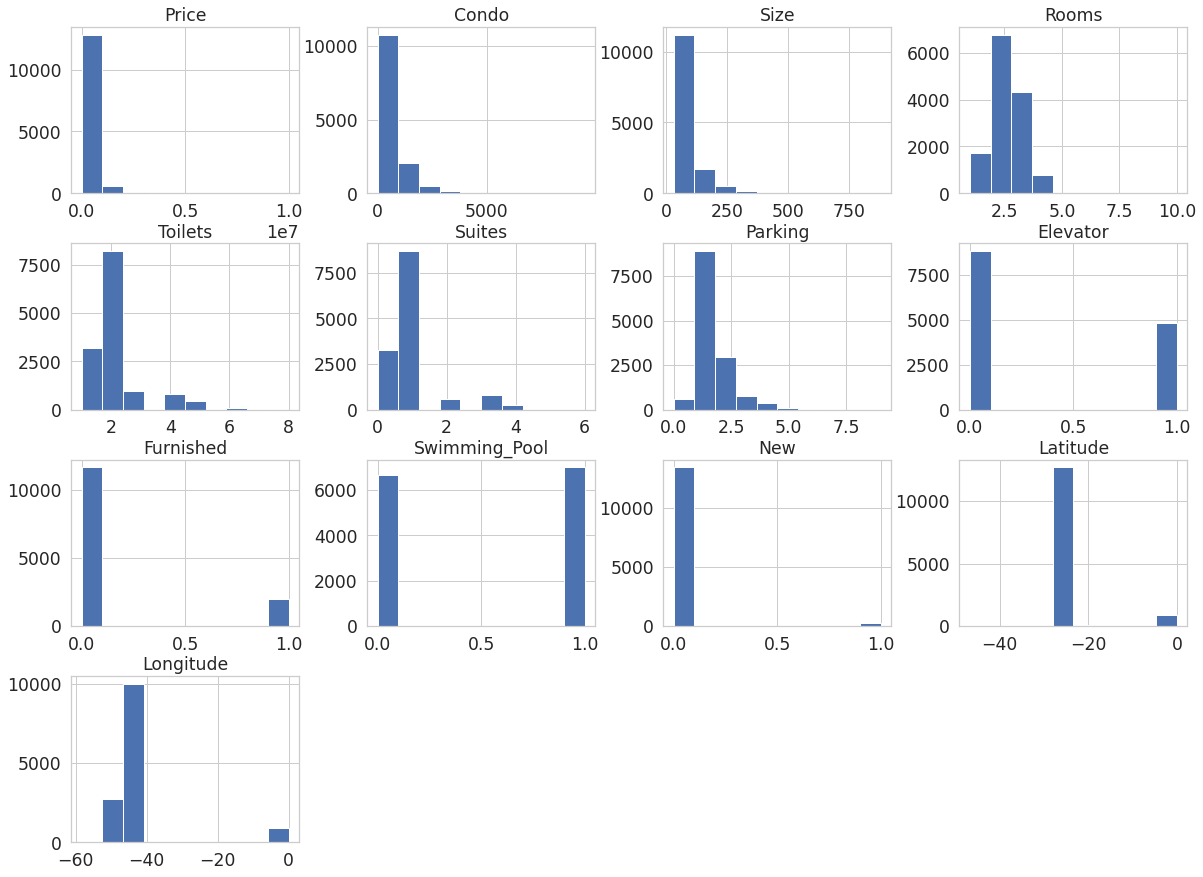

In [ ]:
# plot a histogram for each numeric attibute from the dataframe
housing.hist(bins=10, figsize=(20,15))
display()  # just to avoid texts in the notebook output

In [ ]:
housing['Price'].describe()

count    1.364000e+04
mean     2.877378e+05
std      5.908214e+05
min      4.800000e+02
25%      1.858750e+03
50%      8.100000e+03
75%      3.600000e+05
max      1.000000e+07
Name: Price, dtype: float64

In [ ]:
 housing.query("Negotiation_Type == 'rent'")['Price'].describe()

count     7228.000000
mean      3077.669065
std       3522.830284
min        480.000000
25%       1350.000000
50%       2000.000000
75%       3300.000000
max      50000.000000
Name: Price, dtype: float64

In [ ]:
 housing.query("Negotiation_Type == 'sale'")['Price'].describe()

count    6.412000e+03
mean     6.086241e+05
std      7.404515e+05
min      4.200000e+04
25%      2.500000e+05
50%      3.800000e+05
75%      6.790000e+05
max      1.000000e+07
Name: Price, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f1fa6c110>,
      dtype=object)

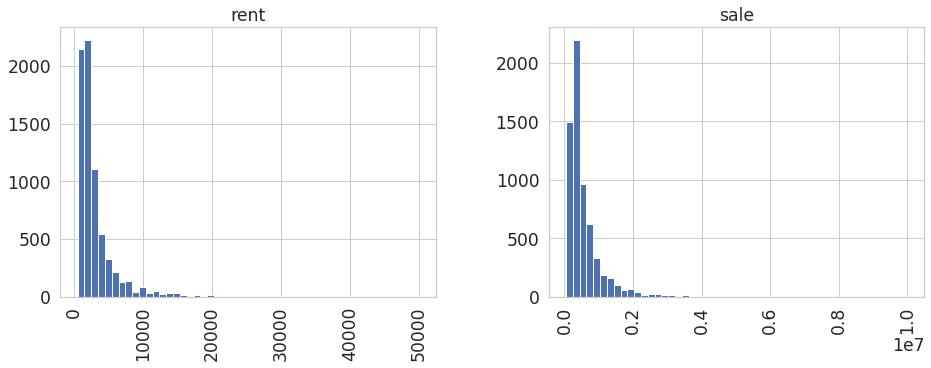

In [ ]:
housing.hist(column="Price", bins=50, by="Negotiation_Type")

**Potential problem**

Renting and selling an appartment are two very different operations. it is expected that the prices for renting are a fraction of the prices for selling the same appartment.

In [48]:
sale = housing.loc[housing['Negotiation_Type'] == 'sale']
rent = housing.loc[housing['Negotiation_Type'] == 'rent']

### 2.4. Create a **`Test Set`**
<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>Splitting a Dataset: Hold-out, random sampling, stratified sampling</td>
</tr>
</table><br/><br/>

_Splitting/sampling_ the dataset into a _training set_ and a ***testing set*** (also called _hold out set_) is crucial for developing of ML solutions. You train your solutions using the _training set_, and you test it using the _testing set_. <br/>
The error rate on new cases is called the **generalization error** (or out-of-sample error), and by evaluating your model on the test set, you get an _estimate_ of this error. <br/>
This value tells you _how well_ your model will perform on instances it has _never seen before_.

Many authors and machine learning practitioners **do not** perform this task _at this stage_ of the ML pipeline. <br/>
They typically use the **entire dataset** for data cleaning, preprocessing, and exploratory data analysis.


For example, when using the **entire dataset** to _impute_ missing values from a specific attribute with its median, one will be _snooping/looking at_ the _future test samples_. <br/>
Consequently, your estimate for the generalization error will be **biased**, and you will launch a system (in production) that _may not_ perform as well as expected. <br/>
This is called ***data snooping bias***. <br/>
Therefore, performing dataset sampling at this stage of the ML pipeline is recommended. <br/>

**OBSERVATIONS:**<br/>
However, there are _some concerns_ with that.

Suppose you have a dataset with 100 samples. <br/>
Initially, you randomly divide it into a **training set** (80 samples) and a **testing set** (20 samples). <br/>
Next, during _data cleaning_, you found out that the _training set_ has **5 samples with missing values** for a given attribute and **5 duplicated samples**. <br/>
Similarly, the _testing set_ has **8 samples with missing values** for the same attribute and **2 duplicated samples**. <br/>
You then decided **to remove _all_ these samples**, resulting in:
- training set with 70 samples
- testing set with 10 samples.

The dataset has changed (80 samples) and, consequently, the _initial proportion_ of the train and test sets too: _80%_ to ___87.5%___ (70/80), and _20%_ to ___12.5%___ (10/80). <br/>
This can impact model training and/or assessment in the _testing set_. <br/>

A _reasonable strategy_ is to perform any _data cleaning tasks_ that **remove samples** -- _e.g._, duplicated samples, samples with missing values, outliers, etc -- across the _entire dataset_ **before** splitting it into. <br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>It is common to use 80% of the data for training and 20% for testing. However, this depends on the size of the dataset: if it contains 10 million instances, then holding out 1% means your test set will contain 100,000 instances, probably more than enough to get a good estimate of the generalization error.</td>
</tr>
</table><br/><br/>

### Checking for duplicated samples

In [49]:
housing['Duplicated'] = housing.duplicated()
housing.query('Duplicated==True')

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Property_Type,Latitude,Longitude,Duplicated


There are 283 duplicated samples (rows) in our dataset. We will remove them

In [ ]:
housing.drop_duplicates(ignore_index=True, inplace=True)

In [ ]:
housing.duplicated().any()

False

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>In some cases, we could have a given attribute (column) whose <i>values</i> should be <b>unique</b>; e.g., ID.</td>
</tr>
<tr>
    <td></td>
    <td>Then, one should check if there are <i>multiple samples</i> with <i>the same value</i> — regardless of their other attributes — and decide how to remove the duplicity.</td>
</tr>
</table><br/><br/><br/>

### Checking samples with missing attributes

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13561 entries, 0 to 13560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13561 non-null  int64  
 1   Condo             13561 non-null  int64  
 2   Size              13561 non-null  int64  
 3   Rooms             13561 non-null  int64  
 4   Toilets           13561 non-null  int64  
 5   Suites            13561 non-null  int64  
 6   Parking           13561 non-null  int64  
 7   Elevator          13561 non-null  int64  
 8   Furnished         13561 non-null  int64  
 9   Swimming_Pool     13561 non-null  int64  
 10  New               13561 non-null  int64  
 11  District          13561 non-null  object 
 12  Negotiation_Type  13561 non-null  object 
 13  Latitude          13561 non-null  float64
 14  Longitude         13561 non-null  float64
dtypes: float64(2), int64(11), object(2)
memory usage: 1.6+ MB


### Segmenting samples by  `Negotiation_Type`

We will follow the premise from the book that the _Negotiation_Type_ is a very important attribute to predict _Price_". So, we need to guarantee that training and testing set are _representative_ for that, otherwise we will have ***bias selection***. <br/>
One way to do that is _to group_ the samples according to their _Negotiation_Type_ and perform a **stratified sampling**.

Since we have a boolean variable for the _Negotiation_Type_, we can segment the samples by creating groups (_strata_) following the proportion of _Negotiation_Type_'s in the dataset. <br/>
Let's then check the distribution of the _Negotiation_Type_.

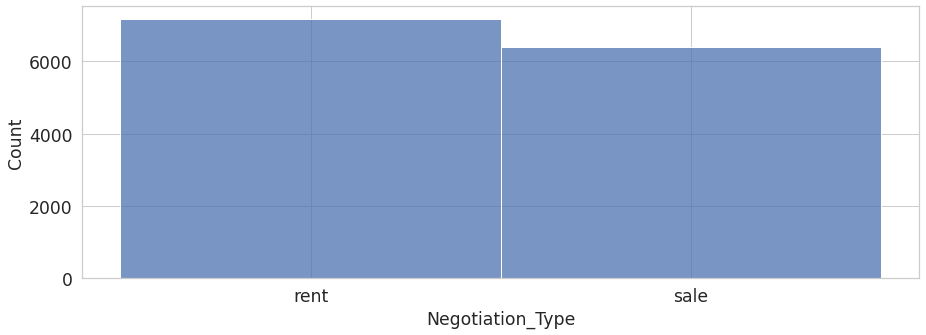

In [ ]:
sns.histplot(data=housing, x='Negotiation_Type', bins=2)

In [ ]:
sale = housing.query('Negotiation_Type=="sale"').shape[0]
rent = housing.query('Negotiation_Type=="rent"').shape[0]

print (f'There are {sale} samples of appartment for sale ({round(sale/housing.shape[0]*100)}%) and {rent} samples of appartment for rent ({round(rent/housing.shape[0]*100)}%) considering the entire dataset.')

There are 6390 samples of appartment for sale (47%) and 7171 samples of appartment for rent (53%) considering the entire dataset.


### Stratified Sampling

In [ ]:
from sklearn.model_selection import train_test_split

housing_train, housing_test = train_test_split(housing, test_size=0.2, stratify=housing['Negotiation_Type'], random_state=42)

In [ ]:
housing_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Latitude,Longitude
9580,4000,1100,120,3,4,1,2,1,0,1,0,Carrão/São Paulo,rent,-23.550486,-46.540741
10388,1170,333,50,2,1,0,1,0,0,1,0,Ponte Rasa/São Paulo,rent,0.000000,0.000000
8834,6950000,5000,302,4,5,4,5,0,0,1,0,Moema/São Paulo,sale,-23.598372,-46.666441
752,3800,1000,69,2,2,1,2,1,1,1,0,Cambuci/São Paulo,rent,-23.579116,-46.625429
6692,245000,400,48,2,2,1,1,1,1,0,0,Vila Formosa/São Paulo,sale,-23.574984,-46.523402


In [ ]:
housing_train.shape

(10848, 15)

In [ ]:
# proportion of the groups in the training set
housing_train['Negotiation_Type'].value_counts() / len(housing_train['Negotiation_Type'])

rent    0.528761
sale    0.471239
Name: Negotiation_Type, dtype: float64

In [50]:
housing_test.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Latitude,Longitude
7644,184900,0,40,2,2,1,1,0,0,0,0,Brasilândia/São Paulo,-23.472508,-46.674688
11932,945000,1837,200,3,2,1,1,0,0,0,0,Bom Retiro/São Paulo,-23.528518,-46.632135
6980,310000,450,65,3,2,1,1,1,0,1,0,Cidade Ademar/São Paulo,-23.668748,-46.673438
8250,287000,130,84,2,1,0,0,1,0,0,0,Brás/São Paulo,-23.550167,-46.617658
11681,98815,0,51,2,2,1,1,0,0,0,0,Socorro/São Paulo,-23.754537,-46.685280


In [ ]:
housing_test.shape

(2713, 15)

In [ ]:
# proportion of the groups in the testing set
housing_test['Negotiation_Type'].value_counts() / len(housing_test['Negotiation_Type'])

rent    0.528935
sale    0.471065
Name: Negotiation_Type, dtype: float64

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>In <i><b>classification problems,</b></i> it is common to have an <b>imbalance</b> between the classes. If this imbalance is <b>severe</b>, the trained classifier may be <i>biased</i> to the largest classes, even performing <i>stratified sampling</i> and choosing suitable metrics for this scenario.</td>
</tr>
<tr>
    <td></td>
    <td>This can also happen in <i><b>regression problems</b></i> like this one when considering a <i>categorical variable</i> to sample the dataset by stratified sampling.</td>
</tr>
<tr>
    <td></td>
    <td>One possible solution is to perform some data sampling method tailored for imbalanced datasets. See more <a href="https://machinelearningmastery.com/data-sampling-methods-for-imbalanced-classification/">here</a>.</td>
</tr>
</table><br/><br/>

## 🧹 3. Data Cleaning

## 📊 4. Explore the Data
We next perform a _simple exploratory data analysis (EDA)_ to gain insights about the data. <br/>
A more complete EDA with hypotheses about the problem should be further elaborated. 

#### **Saving datasets**

In [54]:
# if you want to keep the reference for the row indices from the original dataset, remove the index=False
housing_train.to_csv('/content/sample_data/SPRE_sale_train-1.csv', index=False)
housing_test.to_csv('/content/sample_data/SPRE_sale_test-1.csv', index=False)

Since the dataset is complete, we do not need to fill any values. For now, cleaning will consist in drop two columns (_Property_Type_ and _Duplicated_) that do not impact on regression processes since they are invariant (the first) and auxiliar created to show duplicates (the latter)

In [52]:
housing_train.drop(labels=['Duplicated','Property_Type'], inplace=True,axis=1)
housing_test.drop(labels=['Duplicated','Property_Type'], inplace=True,axis=1)

KeyError: ignored

### 4.1. Visualizing Geographical Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


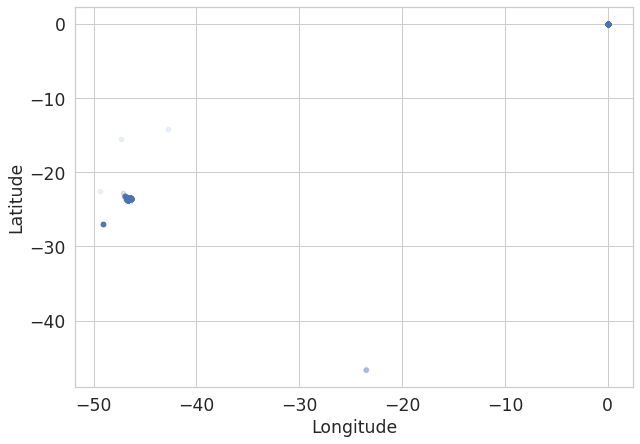

In [56]:
housing_train.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.1, figsize=(10, 7))

In [55]:
housing_train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing_train_clean["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("viridis"), colorbar=True)
plt.xlabel('longitude')
plt.legend()

NameError: ignored

In [57]:
### To install plotly
# pip install plotly
# jupyter labextension install jupyterlab-plotly

### Plotly Maps
# https://plotly.com/python/scattermapbox/
# To plot on Mapbox maps with Plotly you may need a Mapbox account and a public Mapbox Access Token - https://www.mapbox.com/studio

import plotly.express as px

px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')
fig = px.scatter_mapbox(housing_train, lat="Latitude", lon="Longitude", color="Price", 
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

### 4.2. Looking for Correlations
The **correlation coefficient** measures the _linear correlation_ between two variables. It ranges from –1 (perfect negative correlation)  to 1 (perfect positive correlation).

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png' width=800>

Source: https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/2560px-Correlation_examples2.svg.png

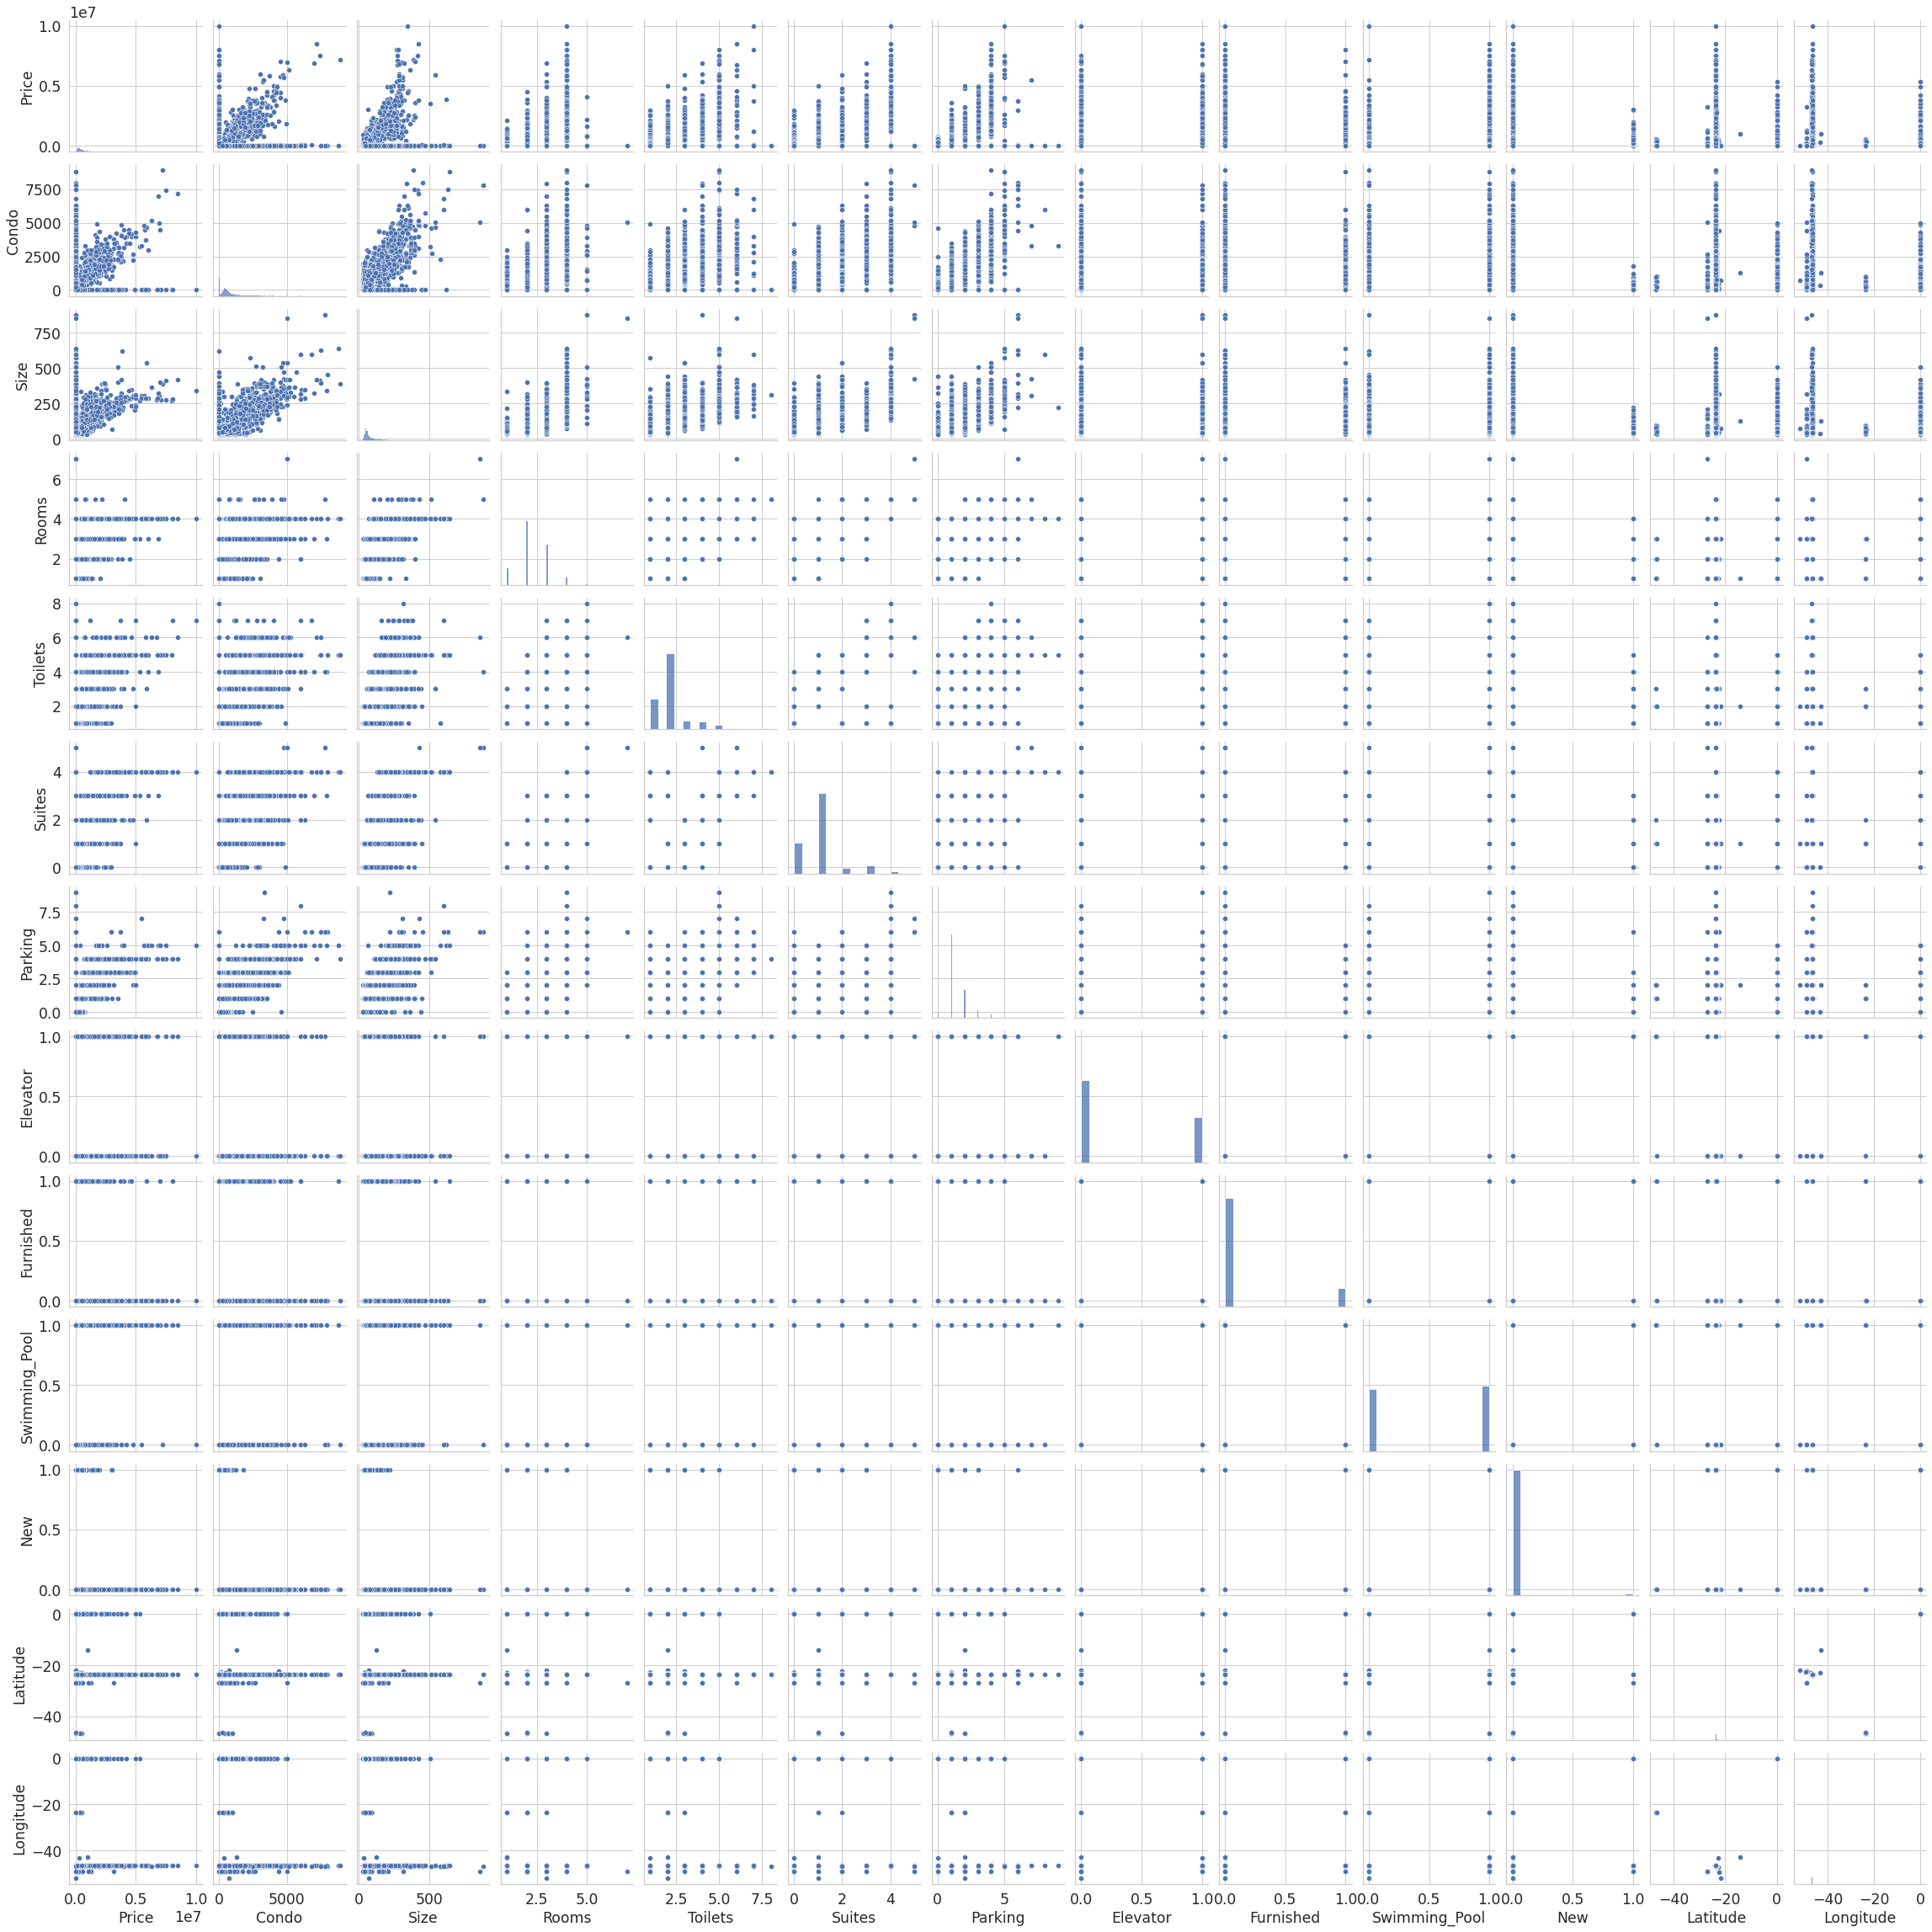

In [ ]:
# 9 numeric attributes ==> 9 x 9 = 81 plots
sns.pairplot(data=housing_train)

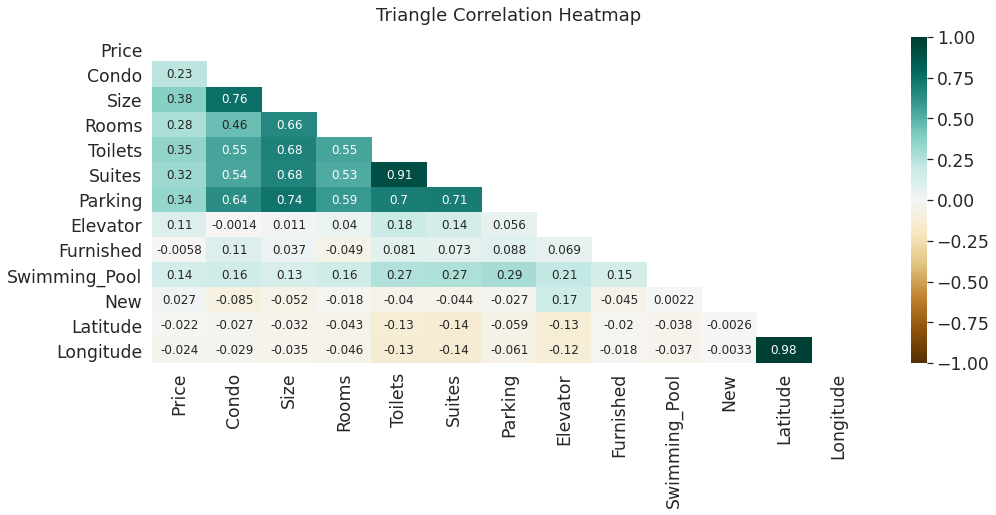

In [ ]:
# plotting the correlation coeficients as a heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(housing_train.corr(), dtype=np.bool))  # creates a triangular matrix based on the pandas correlation matrix

heatmap = sns.heatmap(housing_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
housing_train.corr()["Price"].sort_values(ascending=False)

Price            1.000000
Size             0.380473
Toilets          0.345062
Parking          0.342028
Suites           0.317274
Rooms            0.275245
Condo            0.229309
Swimming_Pool    0.136555
Elevator         0.105993
New              0.027013
Furnished       -0.005821
Latitude        -0.021975
Longitude       -0.023795
Name: Price, dtype: float64

The _most promising attribute_ to predict the `Price` is the **`Size`**, so let’s zoom in on their correlation scatterplot:

<Figure size 720x360 with 0 Axes>

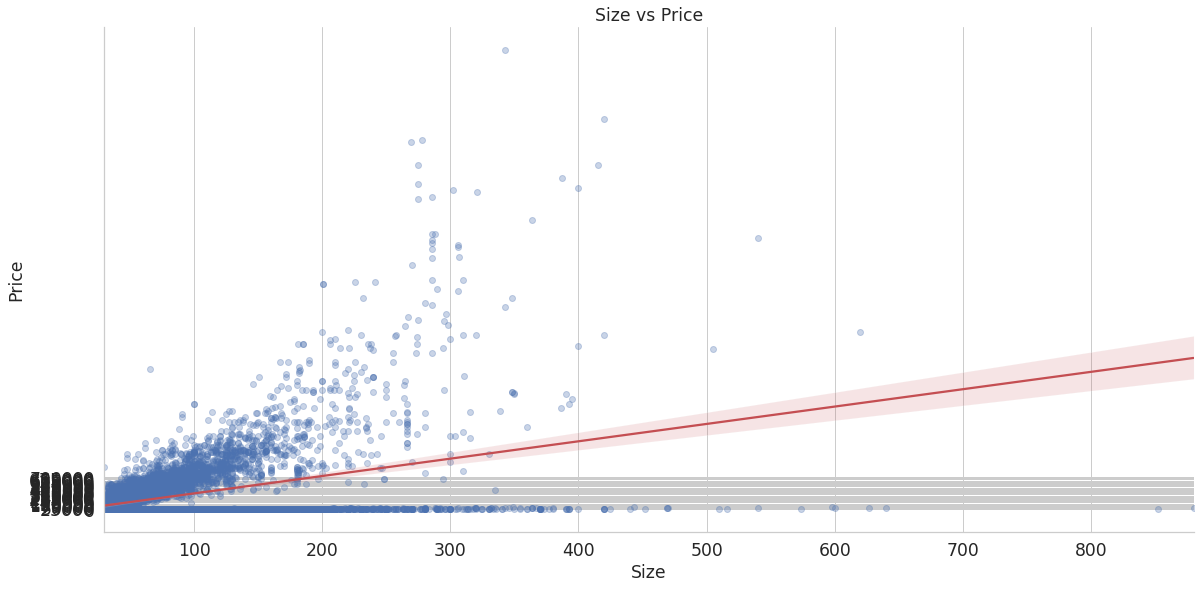

In [ ]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=housing_train, x="Size", y="Price", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 700001, 25000))
plt.grid(True)
plt.title('Size vs Price')
display()

<Figure size 720x360 with 0 Axes>

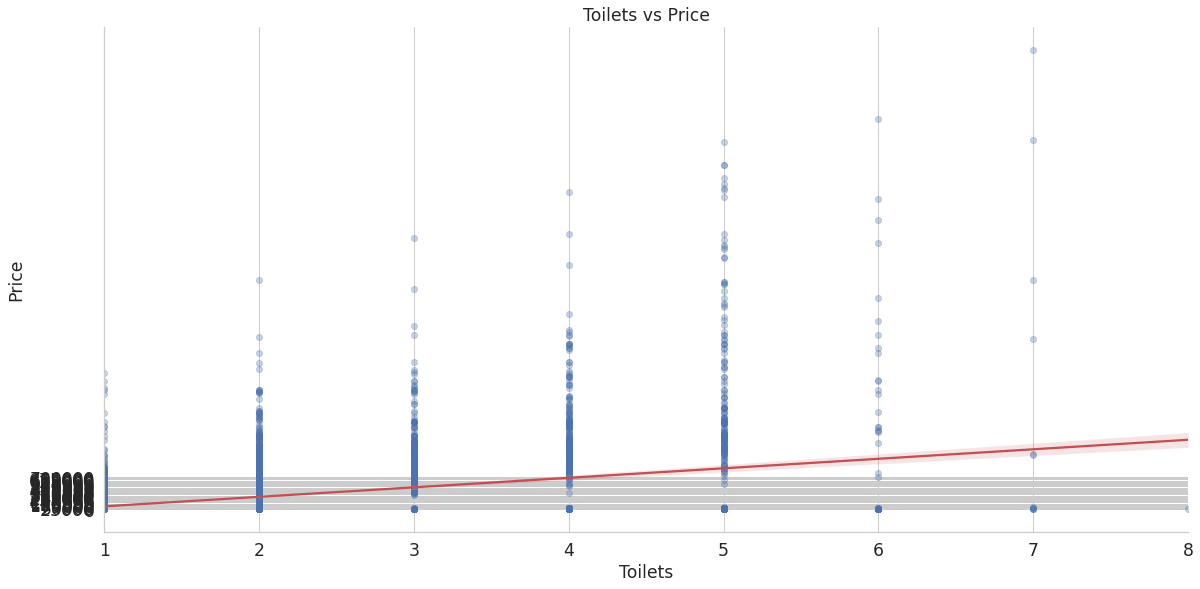

In [ ]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=housing_train, x="Toilets", y="Price", aspect=2, height=8, scatter_kws={'alpha': 0.3}, line_kws={'color': 'r'})
plt.yticks(range(0, 700001, 25000))
plt.grid(True)
plt.title('Toilets vs Price')
display()

Some findings:
- The _correlation_ is **weak**: see the regression line and the _upward trend_

Some (obvious) findings:
- There are misplaced appartments in the dataset (located outside the city of Sao Paulo, sometimes located even outside the State of Sao Paulo and some that have lat/lng =0)
- The most expensive houses are located in central-west area of the city

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>By looking again at the correlation plots, we can see this <i>capping</i> phenomenon happening in other attributes (e.g., <code>housing_median_age</code>).</td>
</tr>
<tr>
    <td></td>
    <td>You could better analyze these cases and, maybe, remove them.</td>
</tr>
</table><br/><br/>

### 4.3. Data distribution

In [ ]:
housing_train.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming_Pool', 'New', 'District',
       'Negotiation_Type', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
numeric_attributes = housing_train.columns.drop(['Rooms','Toilets','Suites','Parking','Elevator','Furnished','Swimming_Pool','New','District','Negotiation_Type'])
numeric_attributes

Index(['Price', 'Condo', 'Size', 'Latitude', 'Longitude'], dtype='object')

In [ ]:
len(numeric_attributes)

5

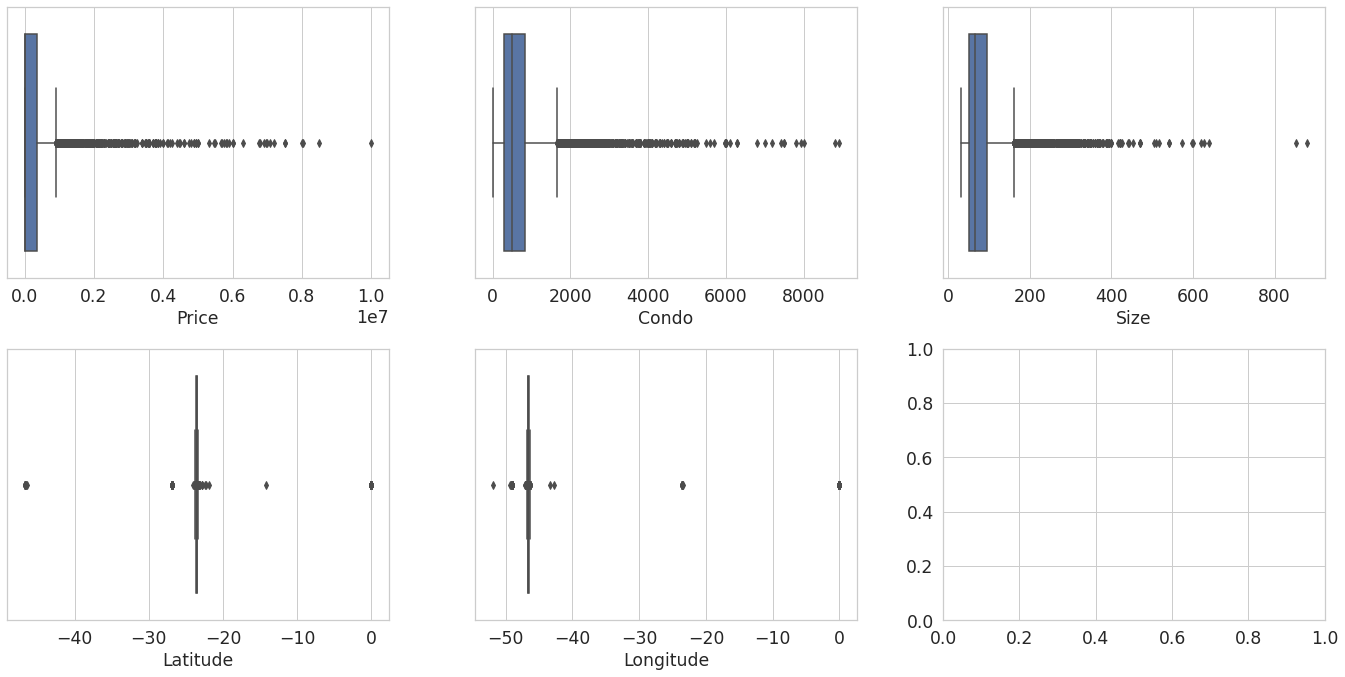

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
fig.tight_layout(pad=3.0)

for i, attr in enumerate(numeric_attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(data=housing_train, x=attr, ax=axes[row, col])


We can see that 3 attributes have many _outliers_. However, we **will not** remove them because _they do not seem to be noise_.

On the other hand, latitude and longitude have outliers related to possibly misplaced (or missing) geographical position.

Let's visualize the location of the districts with _outliers_ for the `latitude` and `longitude` (those >= 8).

In [58]:
px.set_mapbox_access_token('pk.eyJ1IjoiY2llbmNpYWRlZGFkb3NpZnNwY2FtcGluYXMiLCJhIjoiY2tzcW9sNTRhMGR2bzJ1cGcxNTI1bWppdiJ9.4TJwkUhuLIt-2nH0YudsMg')

housing_misplaced = housing_train.query('(Latitude > -23.77 | Latitude <= -23.45) & (Longitude < -46.79 | Longitude > -46.38)')
fig = px.scatter_mapbox(housing_misplaced, lat="Latitude", lon="Longitude", color="Price",
                        color_continuous_scale=px.colors.sequential.Viridis, size_max=15, zoom=5, width=1000, height=800)
fig.show()

We will fix the points that seem to have lat/long inverted and drop the other points

In [62]:
inverted = housing_train.query('(Longitude > -23.77 & Longitude < -23.45) & (Latitude > -46.79 & Latitude < -46.38)')

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Latitude,Longitude
6845,490000,1000,89,2,2,1,1,0,0,0,0,Cambuci/São Paulo,-46.626667,-23.577821
11147,720000,700,100,3,3,1,2,1,0,1,0,Barra Funda/São Paulo,-46.669247,-23.518222
11304,68000,0,90,3,2,1,2,1,0,1,0,Aricanduva/São Paulo,-46.539384,-23.535175
11233,350000,300,66,3,2,1,1,1,0,1,0,Jaçanã/São Paulo,-46.575936,-23.468007
5502,380000,528,48,2,2,1,2,1,0,0,0,Consolação/São Paulo,-46.648555,-23.548484


In [ ]:
inverted_long = inverted['Latitude']
inv

In [ ]:
#housing_misplaced = housing_train.query('(Latitude > -23.77 | Latitude <= -23.45) & (Longitude < -46.79 | Longitude > -46.38)')

## 🛠️ 5. Prepare the Data

In [ ]:
housing_train.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,District,Negotiation_Type,Latitude,Longitude
9580,4000,1100,120,3,4,1,2,1,0,1,0,Carrão/São Paulo,rent,-23.550486,-46.540741
10388,1170,333,50,2,1,0,1,0,0,1,0,Ponte Rasa/São Paulo,rent,0.000000,0.000000
8834,6950000,5000,302,4,5,4,5,0,0,1,0,Moema/São Paulo,sale,-23.598372,-46.666441
752,3800,1000,69,2,2,1,2,1,1,1,0,Cambuci/São Paulo,rent,-23.579116,-46.625429
6692,245000,400,48,2,2,1,1,1,1,0,0,Vila Formosa/São Paulo,sale,-23.574984,-46.523402


#### **Separating the independent variables (features) and the _dependent variable_ (target outcome)**

Since we do not necessarily want to apply the same transformations to the features and the target outcome, let's separate them.

In [ ]:
housing_train_pre = housing_train.drop(columns=['Price'])
housing_train_target = housing_train['Price'].copy()

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>This separation could also happen before <i>data cleaning</i> to isolate the transformations only on the <i>training features.</i></td>
</tr>
<tr>
    <td></td>
    <td>However, there are some concerns. First, if you have samples with <i>missing values</i> for any <i>feature</i> and you decide <b>to drop</b> these samples, you <b>must drop</b> the corresponding ones in the <i>target outcome</i> to keep the number of instances consistent, and vice-versa.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Remember to merge the <i>features</i> and the <i>target outcome</i> into a single dataframe before saving it to disk.</td>
</tr>
</table><br/><br/>

### 5.1. Categorical Variabel Encoding
We have a single _categorical variable_ (`ocean_proximity`) to encode. For that, let's use the [**One Hot Encoding** strategy](https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02): a new binary variable/column (**dummy variable**) is added for each _category_ from the variable.<br/>

In [ ]:
housing_train_pre['District'].value_counts()

Moema/São Paulo              237
Mooca/São Paulo              230
Brás/São Paulo               211
Casa Verde/São Paulo         202
Bela Vista/São Paulo         200
                            ... 
São Rafael/São Paulo          35
Jardim São Luis/São Paulo     34
São Domingos/São Paulo        29
Grajaú/São Paulo              27
Perus/São Paulo               17
Name: District, Length: 96, dtype: int64

In [ ]:
# one hot encoding by pandas
housing_train_pre = pd.get_dummies(data=housing_train_pre, columns=['District'],drop_first=True)
housing_train_pre.head()

KeyError: ignored

In [ ]:
housing_train_pre = pd.get_dummies(data=housing_train_pre, columns=['Negotiation_Type'],drop_first=True)

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>To work properly, we should perform the method <code>.get_dummies()</code> for the <b>entire dataset</b>, and <i>not only</i> for the <b>training set</b>. The reason is that this function will create a new column (<i>dummy variable</i>) for each value in the target categorical variable.</td>
</tr>
<tr>
    <td></td>
    <td>If the categorical variable contains <b>a different number of values</b> in the <i>training set</i> and <i>testing set</i>, the encoding <b>will not be consistent:</b> the number of dummy variables will be different.</td>
</tr>
<tr>
    <td></td>
    <td>An alternative is to use the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html"><code>OneHotEncoder</code> from sklearn</a>. We will use it in the later sprints.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>When incorporating <b>dummy variables</b> in <i><b>regression</b> algorithms</i>, we should be careful with the <b><i>dummy variable trap</i></b>.</td>
</tr>
<tr>
    <td></td>
    <td>The <b><i>dummy variable trap</i></b> occurs when <i>two or more dummy variables</i> created by one-hot encoding are <i>highly correlated</i> (<b>multi-collinear</b>). This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models (<a href="https://www.learndatasci.com/glossary/dummy-variable-trap/#:~:text=machine%20learning%20courses.-,What%20is%20the%20Dummy%20Variable%20Trap%3F,coefficient%20variables%20in%20regression%20models.">source</a>).</td>
</tr>
<tr>
    <td></td>
    <td>To overcome the dummy variable trap, we just <b>drop one</b> of the <i>dummy variables (column)</i>: <code>.get_dummies(drop_first=True)</code>. This can be done because the <i>dummy variables</i> include <i>redundant information</i>.</td>
</tr>
<tr>
    <td></td>
    <td>Apparently, most methods in sklearn deal with this problem, so we need to do nothing (<i>not sure about it</i>).</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>If a categorical attribute has a <b>large number of possible categories</b> (e.g., country code, profession, species), then <i>one-hot encoding</i> will result in <i>a large number of input features</i>. This may slow down training and degrade performance.<br/> If this happens, we have some alternatives:</td>
</tr>
<tr>
    <td></td>
    <td><b>1)</b> Replace the <b>categorical input</b> with useful <i><b>numerical features related to the categories</b></i>. <br/> For example, you could replace the <code>ocean_proximity</code> feature with the <i>distance to the ocean</i>.<br/> Similarly, a <code>country code</code> could be replaced with the <i>country’s population and GDP per capita</i>).</td>
</tr>
<tr>
    <td></td>
    <td><b>2)</b> Create <i>another categorical variable</i> that <b>groups the target categories</b> into <i>high-level ones</i>. <br/> For example, you could use consider the continent instead of the country.<br/>However, the higher the abstraction, the greater the loss of information of the original categorical variable.</td>
</tr>
<tr>
    <td></td>
    <td><b>3)</b> Replace each category with a learnable, low-dimensional vector called an <i>embedding</i>. <br/> Each category’s representation would be learned during training. <br/> This is an example of <i>representation learning</i>.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>We can evaluate different tasks for <i>data cleaning</i> and/or <i>data preparation</i> and check <b>which are the best (or the best combination)</b> for our data.</td>        
</tr>
<tr>
    <td></td>
    <td>For this purpose, we treat theses tasks as <i>hyperparameters</i> and <b>fine-tune them / hyperparameter optimization</b> (e.g., <i>grid search</i>). <br/> We may <i>automatically</i> find the best way to handle outliers, missing features, feature selection, etc.</td>
</tr>
<tr>
    <td></td>
    <td>We will study and use fine-tunning approaches in later sprints.</td>
</tr>
</table><br/><br/>

#### **Saving the pre-processed training set**

In [ ]:
housing_train_pre_saving = housing_train_pre.copy()
housing_train_pre_saving['median_house_value'] = housing_train_target
housing_train_pre_saving.to_csv('/content/sample_data/housing_train_pre_sprint-1.csv', index=False)

In [ ]:
housing_train_pre.head()

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming_Pool,New,Latitude,Longitude,District_Alto de Pinheiros/São Paulo,District_Anhanguera/São Paulo,District_Aricanduva/São Paulo,District_Artur Alvim/São Paulo,District_Barra Funda/São Paulo,District_Bela Vista/São Paulo,District_Belém/São Paulo,District_Bom Retiro/São Paulo,District_Brasilândia/São Paulo,District_Brooklin/São Paulo,District_Brás/São Paulo,District_Butantã/São Paulo,District_Cachoeirinha/São Paulo,District_Cambuci/São Paulo,District_Campo Belo/São Paulo,District_Campo Grande/São Paulo,District_Campo Limpo/São Paulo,District_Cangaíba/São Paulo,District_Capão Redondo/São Paulo,District_Carrão/São Paulo,District_Casa Verde/São Paulo,District_Cidade Ademar/São Paulo,District_Cidade Dutra/São Paulo,District_Cidade Líder/São Paulo,District_Cidade Tiradentes/São Paulo,District_Consolação/São Paulo,District_Cursino/São Paulo,District_Ermelino Matarazzo/São Paulo,...,District_Penha/São Paulo,District_Perdizes/São Paulo,District_Perus/São Paulo,District_Pinheiros/São Paulo,District_Pirituba/São Paulo,District_Ponte Rasa/São Paulo,District_Raposo Tavares/São Paulo,District_República/São Paulo,District_Rio Pequeno/São Paulo,District_Sacomã/São Paulo,District_Santa Cecília/São Paulo,District_Santana/São Paulo,District_Santo Amaro/São Paulo,District_Sapopemba/São Paulo,District_Saúde/São Paulo,District_Socorro/São Paulo,District_São Domingos/São Paulo,District_São Lucas/São Paulo,District_São Mateus/São Paulo,District_São Miguel/São Paulo,District_São Rafael/São Paulo,District_Sé/São Paulo,District_Tatuapé/São Paulo,District_Tremembé/São Paulo,District_Tucuruvi/São Paulo,District_Vila Andrade/São Paulo,District_Vila Curuçá/São Paulo,District_Vila Formosa/São Paulo,District_Vila Guilherme/São Paulo,District_Vila Jacuí/São Paulo,District_Vila Leopoldina/São Paulo,District_Vila Madalena/São Paulo,District_Vila Maria/São Paulo,District_Vila Mariana/São Paulo,District_Vila Matilde/São Paulo,District_Vila Olimpia/São Paulo,District_Vila Prudente/São Paulo,District_Vila Sônia/São Paulo,District_Água Rasa/São Paulo,Negotiation_Type_sale
9580,1100,120,3,4,1,2,1,0,1,0,-23.550486,-46.540741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10388,333,50,2,1,0,1,0,0,1,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8834,5000,302,4,5,4,5,0,0,1,0,-23.598372,-46.666441,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
752,1000,69,2,2,1,2,1,1,1,0,-23.579116,-46.625429,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6692,400,48,2,2,1,1,1,1,0,0,-23.574984,-46.523402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


## 🏋️‍♀️ 6. Train ML Algorithms
In this step, we should train _many_ quick-and-dirty models — with _default values_ for their hyperparameters — from different categories. <br/>
We then _measure the performance_ on the **training set** and shortlist the _top three to five_ **most promising models**.

However, we will only select _one model_ in this sprint — **Linear Regression** — for teaching purposes. We will try new ones in later sprints.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>See the definition and concepts about Linear Regresion in the external presentation.</td>
</tr>
</table><br/><br/>

### 6.1. Getting the independent (features) and dependent variables (outcome)
Before training our models, we want to convert the DataFrame and Series for numpy arrays. <br/>
This is not necessarily on this case since the sklearn models can deal with pandas structures.

However, since we will use sklearn transformers in the future, whose outputs will be numpy arrays, let's consider numpy right now.

Just to keep the standard notation of the ML community, let's use **X** for numpy *feature matrix* and **y** for a numpy array of *labels/outcomes*.

In [ ]:
X_train = housing_train_pre.values
y_train = housing_train_target.values

### 6.1. Training the Models

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # default hyperparameters

# training
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 6.3. Evaluating on the Training Set

### **Prediction**

In [ ]:
y_train_pred = lin_reg.predict(X_train)

### **Metrics**

##### **Coefficient of Determination - R²**
The proportion of _variation_ in the dependent variable (outcome) that is explained by the predictor variables (regression, in this case). <br/>
R² can be interpreted as the percent of variance in our dependent variable that can be explained by our model. <br/>
R² checks how much the regression line fits the data

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=0}^{m-1}(y^{(i)}-\bar{y})^2}$$

##### **Root Mean Squared Error (RMSE)**

$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=0}^{m-1}(y^{(i)}-\hat{y}^{(i)})^2}{m}}$$

#### **Evaluation**

In [ ]:
r2_score = lin_reg.score(X_train, y_train)
print(f'R2 = {r2_score}')

R2 = 0.5280779938632583


In [ ]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_train, y_train_pred, squared=False)
print(f'RMSE = {rmse}')

RMSE = 398551.88203632523


This initial result is not too bad, but clearly not a great score: most districts’ `median_housing_values` approximately range between \\$120,000 (Q1) and $265,000 (Q3), so a typical **prediction error** of \\$69,050 may not be very satisfying. <br/>

This is an example of a **model *underfitting*** the training data. When this happens it can mean that the _features_ **do not** provide enough information to make good predictions, or that the model is not powerful enough.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt-tab</span></td>
    <td>Slides: Overfitting vs Underfitting.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>The main ways <b>to fix <i>underfitting</i></b> are: <br/>
        - To select a more powerful model;<br/>
        - To feed the training algorithm with better features; or <br/>
        - To reduce the constraints on the model (foregularized models).</td>        
</tr>
</table><br/><br/>

### **Visual Analysis**

##### **Prediction vs Real**

Text(0.5, 1.0, 'Median housing value - Prediction vs Real')

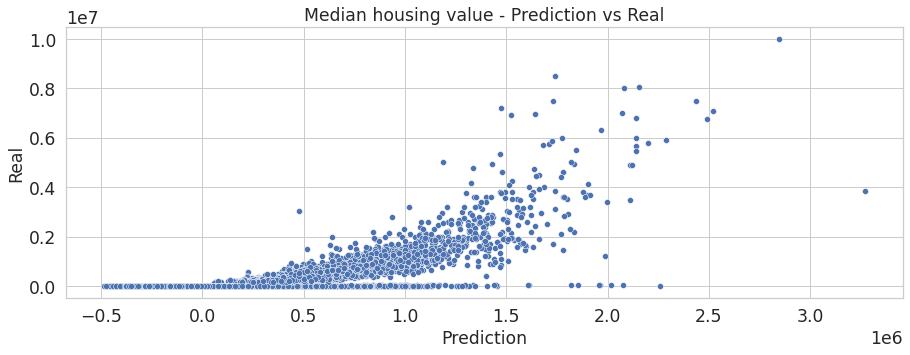

In [ ]:
sns.scatterplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real')

##### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity**.

<img src='https://github.com/xavecoding/IFSP-CMP-D2APR-2021.2/blob/main/projects/portfolio/project-01_regression_California-housing-prices/imgs/residual-analysis.png?raw=1' width=600/>

In [ ]:
residual = y_train - y_train_pred

Text(0.5, 1.0, 'Median housing value - Prediction vs Residual')

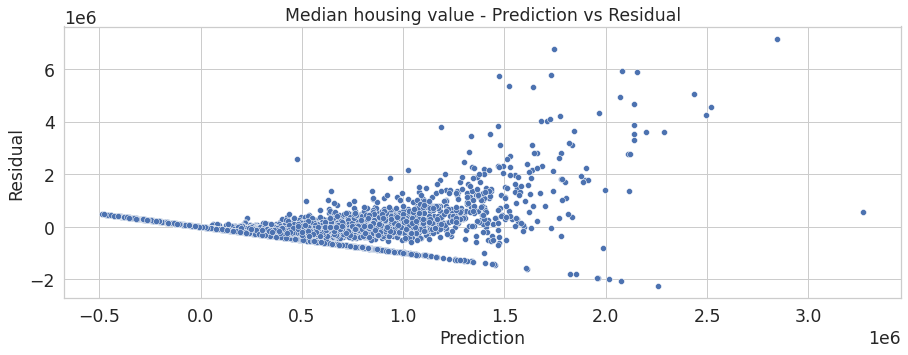

In [ ]:
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual')

Our model **does not** meet the **homoscedasticity**. It seems that the residual is correlated to the prediction values (see the trend). <br/>
Also, see strange behavior with the *top diagonal*. It is very likely to be caused by the capped house ages and prices. We need to treat them.

When violating _homoscedasticity_, you may want to do some work on your input data:
- Maybe you have some variables to add or remove;
- Another solution is to do transformations (e.g,. logaritimic or square root transformation).

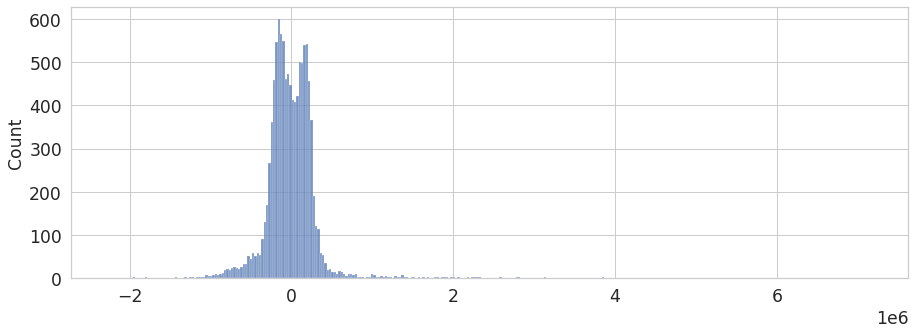

In [ ]:
sns.histplot(residual)

The residual roghly follows a _normal distribution_.

## Some strategies to improve the model
- Adding or remove features
- Cleaning up outliers
- Apply transformations
- Try other models/algorithms (mainly nonlinear)